### <font color = '#4A90E2'>Notebook Set-up</font>

In [3]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from tensorflow.python.data import Dataset

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [10]:
train = pd.read_csv(os.path.join('.', 'datasets', 'train.csv'), dtype={"Age": np.float64})
test = pd.read_csv(os.path.join('.', 'datasets', 'test.csv'), dtype={"Age": np.float64})
print('There are '+ str(len(train)) + ' data points in the training set.')
print('There are '+ str(len(test)) + ' data points in the testing set.')

There are 891 data points in the training set.
There are 418 data points in the testing set.


<h4>About The Data</h4>
<ul>
    <li>Categorical Features in the dataset: Sex, Embarked
    <li>Ordinal Features in the dataset: PClass
</ul>

In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.1,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.5,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.9,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.1,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.1,NaN,C


In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### <font color = '#4A90E2'>Data Exploration</font>

In [16]:
# How big is the dataset?
train.shape

(891, 12)

In [18]:
train.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
              ... 
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Length: 12, dtype: int64

In [19]:
test.isnull().sum() #checking for total null values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
              ... 
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Length: 11, dtype: int64

In [24]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,-0.0,-0.0,0.0,-0.1,-0.0,0.0
Survived,-0.0,1.0,-0.3,-0.1,-0.0,0.1,0.3
Pclass,-0.0,-0.3,1.0,-0.4,0.1,0.0,-0.5
Age,0.0,-0.1,-0.4,1.0,-0.3,-0.2,0.1
SibSp,-0.1,-0.0,0.1,-0.3,1.0,0.4,0.2
Parch,-0.0,0.1,0.0,-0.2,0.4,1.0,0.2
Fare,0.0,0.3,-0.5,0.1,0.2,0.2,1.0


In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


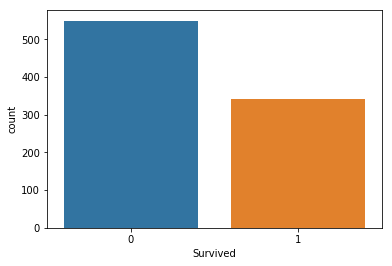

In [27]:
sns.countplot(train['Survived'])

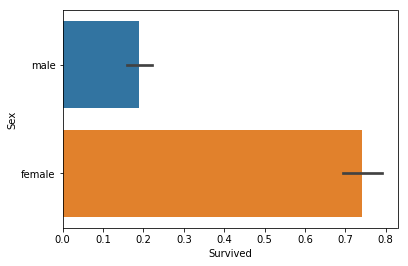

In [28]:
sns.barplot(x = "Survived", y = "Sex", data= train)

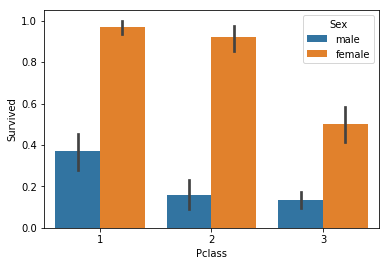

In [29]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)

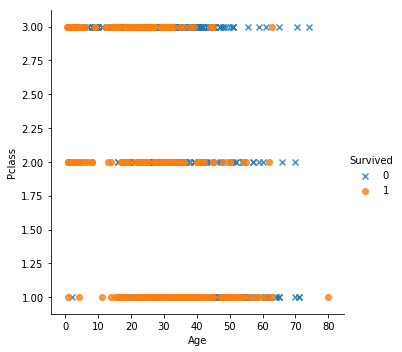

In [26]:
sns.lmplot(x='Age', y='Pclass', hue='Survived', 
           markers=['x', 'o'],
           fit_reg=False, data=train)